In [1]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [2]:
def load_data(resize=(256, 256), batch_size=50):
    import os 
    def __load_data(path):
        sub_paths = os.listdir(path)
        datas = []
        labels = []
        for label, label_name in enumerate(sub_paths):
            for simple in os.listdir(path + os.sep + label_name):
                if simple.endswith('jpg'):
                    labels.append(label)
                    datas.append(path + os.sep + label_name + os.sep + simple)
        datas = tf.data.Dataset.from_tensor_slices(datas)
        labels = tf.data.Dataset.from_tensor_slices(labels)
        def map_img(img_path):
            return tf.image.resize(tf.image.decode_jpeg(tf.io.read_file(img_path)), resize) / 255.
        datas = datas.map(map_img, num_parallel_calls=tf.data.AUTOTUNE)
        ds = tf.data.Dataset.zip((datas, labels))
        # return ds
        return ds.shuffle(buffer_size=len(datas)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
        # return datas.batch(batch_size).prefetch(tf.data.AUTOTUNE), labels.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return __load_data('./training_set/'), __load_data('./test_set/')

In [3]:
# 加载数据
BATCH_SIZE = 20
train_iter, test_iter = load_data(batch_size=BATCH_SIZE, resize=(200, 200))

In [4]:
from tensorflow import keras
net = keras.models.Sequential([
    keras.Input(shape=(200, 200, 3)),
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(strides=2, pool_size=2),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(strides=2, pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(strides=2, pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(strides=2, pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(2)
])
optimizer = keras.optimizers.RMSprop(learning_rate=1e-3)
net.compile(optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [5]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                    

In [6]:
net.fit(train_iter, epochs=50)

Epoch 1/50
401/401 [==============================] - 19s 35ms/step - loss: 0.7026 - accuracy: 0.5196
Epoch 2/50
401/401 [==============================] - 15s 34ms/step - loss: 0.6894 - accuracy: 0.5595
Epoch 3/50
401/401 [==============================] - 16s 35ms/step - loss: 0.6490 - accuracy: 0.6062
Epoch 4/50
401/401 [==============================] - 16s 35ms/step - loss: 0.6207 - accuracy: 0.6632
Epoch 5/50
401/401 [==============================] - 16s 35ms/step - loss: 0.5818 - accuracy: 0.6952
Epoch 6/50
401/401 [==============================] - 15s 35ms/step - loss: 0.5242 - accuracy: 0.7464
Epoch 7/50
401/401 [==============================] - 16s 35ms/step - loss: 0.4753 - accuracy: 0.7795
Epoch 8/50
401/401 [==============================] - 16s 35ms/step - loss: 0.4365 - accuracy: 0.8021
Epoch 9/50
401/401 [==============================] - 16s 35ms/step - loss: 0.4147 - accuracy: 0.8164
Epoch 10/50
401/401 [==============================] - 15s 35ms/step - loss: 0.413

In [14]:
net.history.history.keys()

dict_keys(['loss', 'accuracy'])

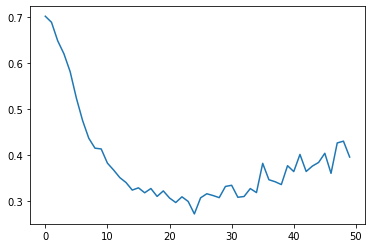

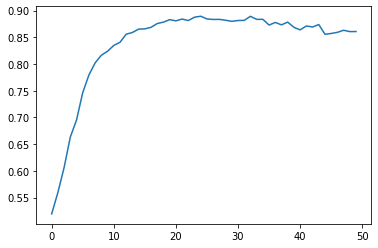

In [15]:
from matplotlib import pyplot as plt
plt.plot(net.history.history['loss'])
plt.show()
plt.plot(net.history.history['accuracy'])